# Protocole Room acoustique

Au cours de ce laboratoire, on utilise le package pyroomacoustics pour observer la propagation de l'acoustique dans différents espaces et différentes situations.


## Objectifs

En plus d'offir l'oportunité de faire un laboratoire à distance, ce laboratoire a pour objectif d'initier les étudiants aux simulations qui peut être une partie importante de la carrière de l'ingénieur en physique. De plus, plusieurs compagnies de Québec qui engagent des ingénieurs en physique s'intéressent à l'acoustique.

Au cours de ce laboratoire,

 - vous développerez une compréhension plus exhaustive de comment _Pyroomacoustics_ effectue ses calculs et ce qu'il prend en compte,
 - vous mesurerez coefficients liés à la propagation des ondes acoustiques dans l'air,
 - vous calculerez des paramètres importants dans l'étude des échoes comme la _RIR_ (_Room Impulse Response_) et le _RT60_,
 - vous comparerez vos résultats de simulation à des mesures expérimentales prises à l'aide d'un cellulaire,
 - vous pourrez laisser cours à votre imagination pour créer vous même une expérience.


# Matériel

Pour effectuer ce laboratoire, vous aurez besoin

 - du logiciel _Python3_,
 - d'un téléphone intelligent avec microphone pour enregistrer un son généré par un ordinateur,
 - d'un galon à mesurer pour mesurer la pièce dans laquelle vous faites votre mesure acoustique,
 - des packages suivants.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve
import IPython
import pyroomacoustics as pra

## Documentation

Vous trouverez dans la documentation sur le package _Pyroomacoustics_ sous forme d'example ici: https://nbviewer.jupyter.org/github/LCAV/pyroomacoustics/blob/master/notebooks/pyroomacoustics_demo.ipynb

De plus, la commande ci-dessous offre de la documentation qui pourrait vous être utile

In [51]:
# print(pra.room.__doc__)

** La commade de documentation ci-dessus peut être utilisée pour presque toutes les fonctions dans _Pyroomacoustics_

## Manipulations

### Comprendre comment la simulation fonctionne

Dans cette partie, utilisez la partie de code ci-dessous inspirée de la documentation _/notebooks/pyroomacoustics_demo.ipynb_ pour répondre aux questions suivantes:

 1. Qu'est-ce l'ordre de l'image?
 2. Dans quelle situation est-ce que le nombre de rayons importe?
 3. Que signifie le paramètre _energy_thres_?
 4. Pourquoi est-ce n'est-il pas recommandé de mettre l'ordre de l'image et le nombre de rayon au maximum? Optimisez les valeurs de ces paramètres. Quels valeurs obtenez-vous?
 5. Résumez, dans vos mots comment fonctionne la simulation.


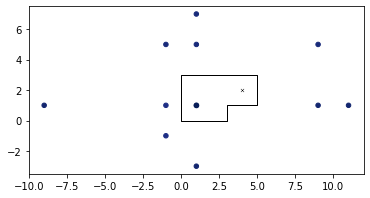

In [57]:
# l'ordre de la simulation est définit ici
simulation_order = 2

# Je commence par définir un fichier à lire (qui est dans le dossier du code) qui donne deux informations:
# le signal et la fréquence d'echantillonage
fs, signal = wavfile.read("arctic_a0010.wav")

# Définir la pièce avec ses materiaux
corners = np.array([[0,0], [0,3], [5,3], [5,1], [3,1], [3,0]]).T  # [x,y]
wall_absorption = 0.2
wall_scattering = 0.1
m = pra.Material(wall_absorption, wall_scattering)
room = pra.Room.from_corners(corners, fs=fs, max_order=simulation_order, materials=m, ray_tracing=True, air_absorption=True)

# Ajouter une source et un microphone
X_source = [1, 1]
room.add_source(X_source, signal=signal)
X_micro = np.array([[4], [2]])  # [[x], [y], [z]]
room.add_microphone(X_micro)

# Ajuster les paramètres du tracer de rayon
room.set_ray_tracing(receiver_radius=0.5, n_rays=10000, energy_thres=1e-5)

# calcule les sources images
room.image_source_model();

# trace un schema de la situation
fig, ax = room.plot(img_order=simulation_order)

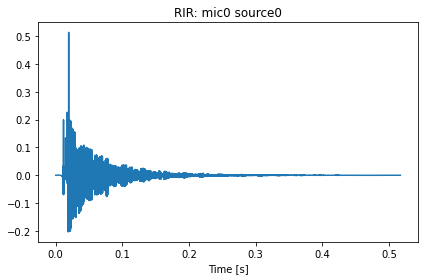

In [58]:
# La RIR (room impulse response) est un résultat clef de ce package
room.plot_rir()
fig = plt.gcf()

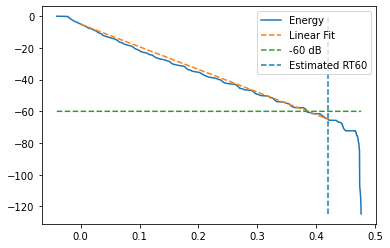

The RT60 is 421 ms


In [59]:
# On peut aussi avoir une valeur scalaire à la sortie de la simulation: le RT60
t60 = pra.experimental.measure_rt60(room.rir[0][0], fs=room.fs, plot=True)
print(f"The RT60 is {t60 * 1000:.0f} ms")